In [28]:
# setup
from load_feature import load_features
from datetime import datetime
from LSTM_model import video_classification
import numpy as np
import os
from keras import optimizers

%load_ext autoreload
%autoreload 2
%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [31]:
# load features for different number of frames
skipnum = 0
num_frames = 20
size = (224, 224, 3)
# num_videos = 1000

# more balanced data
idx_path = os.getcwd() + '/datasets/x_train_ind_above400.npy'
Xtrain_idx = np.load(idx_path)
labels = np.load(os.getcwd() + '/datasets/y_train_mapped_above400.npy')

# if all videos then 
num_videos = len(Xtrain_idx)

tic = datetime.now()
Xtrain, ytrain = load_features(num_videos, num_frames, video_idx = Xtrain_idx, \
                               labels = labels, size = size, skip_num=skipnum)
toc = datetime.now()
print('Feature fusion time: ', toc-tic)

processing videos...


  UserWarning)
  UserWarning)
Process ForkPoolWorker-7:
Process ForkPoolWorker-6:
Process ForkPoolWorker-8:
Process ForkPoolWorker-1:


Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
  File "/usr/lib/python3.5/multiprocessing/process.py", line 249, in _bootstrap
    self.run()
  File "/usr/lib/python3.5/multiprocessing/process.py", line 249, in _bootstrap
    self.run()
  File "/usr/lib/python3.5/multiprocessing/process.py", line 249, in _bootstrap
    self.run()
Process ForkPoolWorker-5:
Process ForkPoolWorker-2:
  File "/usr/lib/python3.5/multiprocessing/process.py", line 93, in run
    self._target(*self._args, **self._kwargs)
  File "/usr/lib/python3.5/multiprocessing/process.py", line 93, in run
    self._target(*self._args, **self._kwargs)
  File "/usr/lib/python3.5/multiprocessing/process.py", line 93, in run
    self._target(*self._args, **self._kwargs)
  File "/usr/lib/python3.5/multiprocessing/pool.py", line 119, in wo

KeyboardInterrupt: 

Traceback (most recent call last):
Traceback (most recent call last):
Process ForkPoolWorker-4:
Process ForkPoolWorker-3:
  File "/usr/lib/python3.5/multiprocessing/process.py", line 249, in _bootstrap
    self.run()
  File "/usr/lib/python3.5/multiprocessing/process.py", line 249, in _bootstrap
    self.run()
Traceback (most recent call last):
Traceback (most recent call last):
  File "/usr/lib/python3.5/multiprocessing/process.py", line 93, in run
    self._target(*self._args, **self._kwargs)
  File "/usr/lib/python3.5/multiprocessing/process.py", line 93, in run
    self._target(*self._args, **self._kwargs)
  File "/usr/lib/python3.5/multiprocessing/process.py", line 249, in _bootstrap
    self.run()
  File "/usr/lib/python3.5/multiprocessing/process.py", line 249, in _bootstrap
    self.run()
  File "/usr/lib/python3.5/multiprocessing/pool.py", line 119, in worker
    result = (True, func(*args, **kwds))
  File "/usr/lib/python3.5/multiprocessing/pool.py", line 119, in worker
    r

In [3]:
print('Xtrain shape: ', Xtrain.shape)
print('ytrain shape: ', ytrain.shape)

Xtrain shape:  (20000, 7, 7, 512)
ytrain shape:  (1000,)


  UserWarning)

  UserWarning)

  UserWarning)

  UserWarning)

  UserWarning)

  UserWarning)

  UserWarning)

  UserWarning)

  UserWarning)

  UserWarning)

  UserWarning)

  UserWarning)

  UserWarning)

  UserWarning)

  UserWarning)

  UserWarning)

  UserWarning)

  UserWarning)

  UserWarning)

  UserWarning)

  UserWarning)

  UserWarning)

  UserWarning)

  UserWarning)

  UserWarning)

  UserWarning)

  UserWarning)

  UserWarning)

  UserWarning)

  UserWarning)

  UserWarning)

  UserWarning)

  UserWarning)

  UserWarning)

  UserWarning)

  UserWarning)

  UserWarning)

  UserWarning)

  UserWarning)

  UserWarning)

  UserWarning)

  UserWarning)

  UserWarning)

  UserWarning)

  UserWarning)

  UserWarning)

  UserWarning)

  UserWarning)

  UserWarning)

  UserWarning)

  UserWarning)

  UserWarning)

  UserWarning)

  UserWarning)

  UserWarning)

  UserWarning)

  UserWarning)

  UserWarning)

  UserWarning)

  UserWarning)

  UserWarning)

  UserWarning)

  UserWa

In [29]:
np.save(os.getcwd() + '/datasets/Xtrain_lstm_1000.npy', Xtrain)
np.save(os.getcwd() + '/datasets/ytrain_lstm_1000.npy', ytrain)

In [2]:
# small dataset 1000 videos with 20 frames
Xtr = np.load(os.getcwd() + '/datasets/Xtrain_lstm_1000.npy')
ytr = np.load(os.getcwd() + '/datasets/ytrain_lstm_1000.npy')

In [3]:
# pretrained data 10 frames in order to compare with temporal max pooling architecture
Xtr = np.load(os.getcwd() + '/datasets/pretrained_fuse_features.npy')
ytr = np.load(os.getcwd() + '/datasets/y_train_mapped_above400.npy')
print('Xtrain shape: ', Xtr.shape)
print('ytrain shape: ', ytr.shape)

Xtrain shape:  (4270, 10, 7, 7, 512)
ytrain shape:  (4270,)


In [24]:
# build up model 
num_classes = len(np.unique(ytr))
lstm = video_classification(num_frames=10, num_classes=num_classes)

# cell_num depends on volume of datasets
lstm.build_model(cell_num = 512, dropout_rate=0.5, reg=0.5)
print('LSTM model summary: ')
print(lstm.model.summary())

building model...
LSTM model summary: 
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_21 (LSTM)               (None, 10, 512)           52430848  
_________________________________________________________________
lstm_22 (LSTM)               (None, 10, 512)           2099200   
_________________________________________________________________
lstm_23 (LSTM)               (None, 10, 512)           2099200   
_________________________________________________________________
lstm_24 (LSTM)               (None, 10, 512)           2099200   
_________________________________________________________________
lstm_25 (LSTM)               (None, 512)               2099200   
_________________________________________________________________
dense_5 (Dense)              (None, 10)                5130      
Total params: 60,832,778
Trainable params: 60,832,778
Non-trainable params: 0
_________________________

In [25]:
# sgd_m = optimizers.SGD(lr=1e-3, decay=1e-6, momentum=0.9, nesterov=True)
adam = optimizers.Adam(lr=1e-4, beta_1=0.9, beta_2=0.999, epsilon=1e-8, decay=1e-6)
lstm.train(Xtr=Xtr, ytr=ytr, optimizer = adam, verbose=1, bsize=32, epochs=20)

Model is Training...
Train on 3416 samples, validate on 854 samples
Epoch 1/20
3416/3416 [==============================] - 38s - loss: 10.7772 - acc: 0.1888 - val_loss: 9.2759 - val_acc: 0.3407
Epoch 2/20
3416/3416 [==============================] - 39s - loss: 8.0834 - acc: 0.3765 - val_loss: 6.9214 - val_acc: 0.4473
Epoch 3/20
3416/3416 [==============================] - 39s - loss: 6.0842 - acc: 0.4880 - val_loss: 5.3743 - val_acc: 0.4906
Epoch 4/20
3416/3416 [==============================] - 39s - loss: 4.6402 - acc: 0.5565 - val_loss: 4.2636 - val_acc: 0.5246
Epoch 5/20
3416/3416 [==============================] - 39s - loss: 3.5384 - acc: 0.6183 - val_loss: 3.4969 - val_acc: 0.5340
Epoch 6/20
3416/3416 [==============================] - 38s - loss: 2.6870 - acc: 0.6780 - val_loss: 2.8339 - val_acc: 0.5785
Epoch 7/20
3416/3416 [==============================] - 39s - loss: 2.1024 - acc: 0.7081 - val_loss: 2.4530 - val_acc: 0.5738
Epoch 8/20
3416/3416 [===========================

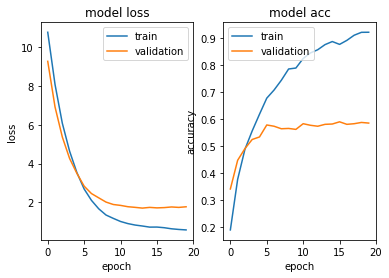

In [26]:
lstm.plot()

In [27]:
# test data loader
num_videos_test = 500
skipnum = 0
num_frames = 20
size = (224, 224, 3)
idx_path = os.getcwd() + '/datasets/x_test_ind_above400.npy'
Xtest_idx = np.load(idx_path)[:num_videos_test]
yte = np.load(os.getcwd() + '/datasets/y_test_mapped_above400.npy')[:num_videos_test]
tic = datetime.now()
Xte, yte = load_features(num_videos = num_videos_test, num_frames = num_frames, size = size, \
                             video_idx = Xtest_idx, labels = yte, skip_num=skipnum)
toc = datetime.now()
print('Feature fusion time: ', toc-tic)

processing videos...
process 64/500
process 128/500
process 192/500
process 256/500
process 320/500
process 384/500
process 448/500
cache processed data...
Feature fusion time:  0:03:39.207685


  UserWarning)
  UserWarning)
  UserWarning)
  UserWarning)
  UserWarning)
  UserWarning)
  UserWarning)
  UserWarning)








  UserWarning)
  UserWarning)
  UserWarning)
  UserWarning)
  UserWarning)
  UserWarning)
  UserWarning)
  UserWarning)








  UserWarning)
  UserWarning)
  UserWarning)
  UserWarning)
  UserWarning)
  UserWarning)
  UserWarning)
  UserWarning)








  UserWarning)
  UserWarning)
  UserWarning)
  UserWarning)
  UserWarning)
  UserWarning)
  UserWarning)
  UserWarning)








  UserWarning)
  UserWarning)
  UserWarning)
  UserWarning)
  UserWarning)
  UserWarning)
  UserWarning)
  UserWarning)








  UserWarning)
  UserWarning)
  UserWarning)
  UserWarning)
  UserWarning)
  UserWarning)
  UserWarning)
  UserWarning)








  UserWarning)
  UserWarning)
  UserWarning)
  UserWarning)
  UserWarning)
  UserWarning)
  UserWarning)
  UserWarning)








  UserWarning)
  UserWarning)
  UserWarning)
  UserWarning)
  UserWarning)
  UserWarning)
  UserWarning)

In [30]:
np.save(os.getcwd() + '/datasets/Xte_lstm_1000.npy', Xte)
np.save(os.getcwd() + '/datasets/yte_lstm_1000.npy', yte)

In [29]:
# test accuracy
Xte = np.load(os.getcwd() + '/datasets/Xte_lstm_1000.npy')
yte = np.load(os.getcwd() + '/datasets/yte_lstm_1000.npy')

In [7]:
# pretrained data 10 frames
Xte = np.load(os.getcwd() + '/datasets/pretrained_fuse_Xtest.npy')
yte = np.load(os.getcwd() + '/datasets/y_test_mapped_above400.npy')

In [29]:
Xte = Xte.reshape((-1, 10, 7*7*512))
lstm.predict(Xte, yte)

Video Classification Accuracy: 0.5956284153005464


In [30]:
from sklearn.metrics import classification_report
from pprint import pprint
ypred = lstm.model.predict(Xte)
ypred = np.argmax(ypred, axis = 1)
target_names = ['music', 'gaming', 'sports/actions', 'news/events/politics', 'movie/comedy', 'vehicles/autos',\
           'howto', 'animals/pets', 'kids/family', 'food/drink']
print(classification_report(yte, ypred, target_names = target_names))

                      precision    recall  f1-score   support

               music       0.40      0.48      0.44       195
              gaming       0.53      0.63      0.57       122
      sports/actions       0.79      0.66      0.72       288
news/events/politics       0.55      0.49      0.52       133
        movie/comedy       0.48      0.59      0.53       220
      vehicles/autos       0.76      0.76      0.76       229
               howto       0.61      0.47      0.53       163
        animals/pets       0.57      0.60      0.59       145
         kids/family       0.50      0.48      0.49       152
          food/drink       0.73      0.66      0.69       183

         avg / total       0.61      0.60      0.60      1830



In [13]:
num_videos = 1000
skipnum = 0
num_frames = 30
size = (224, 224, 3)


tic = datetime.now()
Xtest, ytrain_1 = load_features(num_videos, num_frames, size, skip_num=skipnum)
toc = datetime.now()
print('Feature fusion time: ', toc-tic)

find matched cache file /home/sunjiajun/cs231n_project/datasets/cache/num_videos1000_skipnum0_num_frame30.npz
Feature fusion time:  0:00:10.385741


In [14]:
num_videos = 1000
skipnum = 1000
num_frames = 30
h = 224
w = 224
c = 3

tic = datetime.now()
Xtrain_2, ytrain_2 = load_features(num_videos, num_frames, h, w, c, skip_num=skipnum)
toc = datetime.now()
print('Feature fusion time: ', toc-tic)

find matched cache file /home/sunjiajun/cs231n_project/datasets/cache/num_videos1000_skipnum1000_num_frame30.npz
Feature fusion time:  0:00:47.317992


In [15]:
num_videos = 1000
skipnum = 2000
num_frames = 30
h = 224
w = 224
c = 3

tic = datetime.now()
Xtrain_3, ytrain_3 = load_features(num_videos, num_frames, h, w, c, skip_num=skipnum)
toc = datetime.now()
print('Feature fusion time: ', toc-tic)

find matched cache file /home/sunjiajun/cs231n_project/datasets/cache/num_videos1000_skipnum2000_num_frame30.npz
Feature fusion time:  0:00:10.291387


In [16]:
num_videos = 1000
skipnum = 3000
num_frames = 30
h = 224
w = 224
c = 3

tic = datetime.now()
Xtrain_4, ytrain_4 = load_features(num_videos, num_frames, h, w, c, skip_num=skipnum)
toc = datetime.now()
print('Feature fusion time: ', toc-tic)

find matched cache file /home/sunjiajun/cs231n_project/datasets/cache/num_videos1000_skipnum3000_num_frame30.npz
Feature fusion time:  0:00:11.380633
